In [92]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv, json
import seaborn as sns
from matplotlib.lines import Line2D


def bfactor_normalization(data):
    return (data - np.mean(data)) / (np.std(data) + 1)

def split(data, indexes):
    is_in_indexes = data[indexes]
    mask = np.ones(len(data), dtype=bool)
    mask[indexes] = False
    is_not_in_indexes = data[mask]
    return is_in_indexes, is_not_in_indexes

def get_stats(metric_path, annotation_path, normalize_bfactors=False):
    pocket_stats, nonpocket_stats = np.array([]), np.array([])
    
    for filename in os.listdir(annotation_path):
        # print(f'Processing {filename}')
        if filename not in os.listdir(metric_path):
            print(f'Skipping {metric_path}/{filename}')
            continue

        indices = np.load(f'{annotation_path}/{filename}', allow_pickle=True)
        bfactors = np.load(f'{metric_path}/{filename}', allow_pickle=True)

        if normalize_bfactors:
            bfactors = bfactor_normalization(bfactors)

        pocket_subset, nonpocket_subset = split(bfactors, indices)
        pocket_stats = np.concatenate((pocket_stats, pocket_subset))
        nonpocket_stats = np.concatenate((nonpocket_stats, nonpocket_subset))

    return pocket_stats, nonpocket_stats

def print_histogram_plot(distributions, labels, title, y_label, bins=40, xmax=None, ymax=None):    
    min_val = float('inf')
    max_val = float('-inf')
    for i in distributions:
        min_val = min(np.min(i), min_val)
        max_val = max(np.max(i), max_val)

    fig, ax = plt.subplots(figsize=(12,6))
    # for distribution, label in zip(distributions, labels):
    #     sns.histplot(distribution, bins=bins, kde=True, label=label, stat='percent', kde_kws={"bw_adjust":5}, 
    #                  common_bins=False, common_norm=False, binrange=(min_val, max_val))
    
    sns.histplot(distributions, kde=True, stat='percent', kde_kws={"bw_adjust":5}, bins=bins,
                common_bins=False, common_norm=False, binrange=(min_val, max_val))

    # n, _, patches = plt.hist(distributions, bins=bins , label = labels, density=True)  
    # for distribution in distributions:
    #     sns.kdeplot(distribution)
    custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:orange', lw=4),
                Line2D([0], [0], color='tab:green', lw=4)]

    plt.legend(custom_lines, labels)

    plt.title(title)
    if xmax is not None:
        plt.xlim(xmax[0], xmax[1])
    if ymax is not None:
        plt.ylim(0, ymax)
    plt.show()

def print_plots(cryptobench_features, rigid_features,cryptobench_annotations, rigid_annotations, label, bins=40, xmax=None, normalize_bfactors=False, ymax=None):
    cryptobench_pocket_stats, cryptobench_nonpocket_stats = get_stats(cryptobench_features, cryptobench_annotations, normalize_bfactors=normalize_bfactors)
    rigid_pocket_stats, rigid_nonpocket_stats = get_stats(rigid_features, rigid_annotations, normalize_bfactors=normalize_bfactors)

    nonpocket_stats = np.concatenate((cryptobench_nonpocket_stats, rigid_nonpocket_stats))

    print_histogram_plot([cryptobench_pocket_stats, rigid_pocket_stats, nonpocket_stats], 
                           ['Cryptic binding', 'Rigid binding', 'Non-binding'], label, label, bins, xmax, ymax)


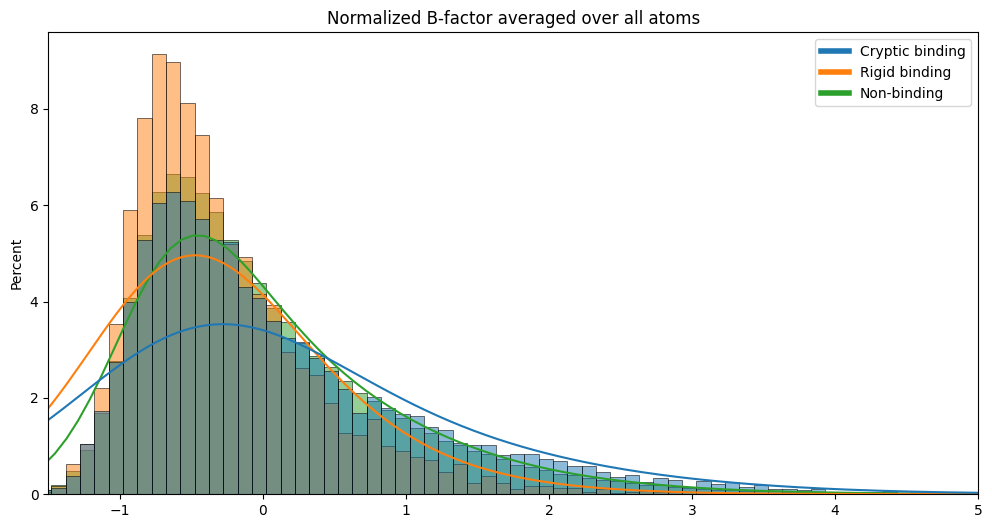

In [93]:
print_plots(
    '../../../data/features/B-factors/cryptobench-dataset',
    '../../../data/features/B-factors/rigid-dataset',
    '../../../data/features/fluctuation/cryptobench-dataset/indices',
    '../../../data/features/fluctuation/rigid-dataset/indices',
    'Normalized B-factor averaged over all atoms', xmax=(-1.5,5), normalize_bfactors=True,bins=160
)

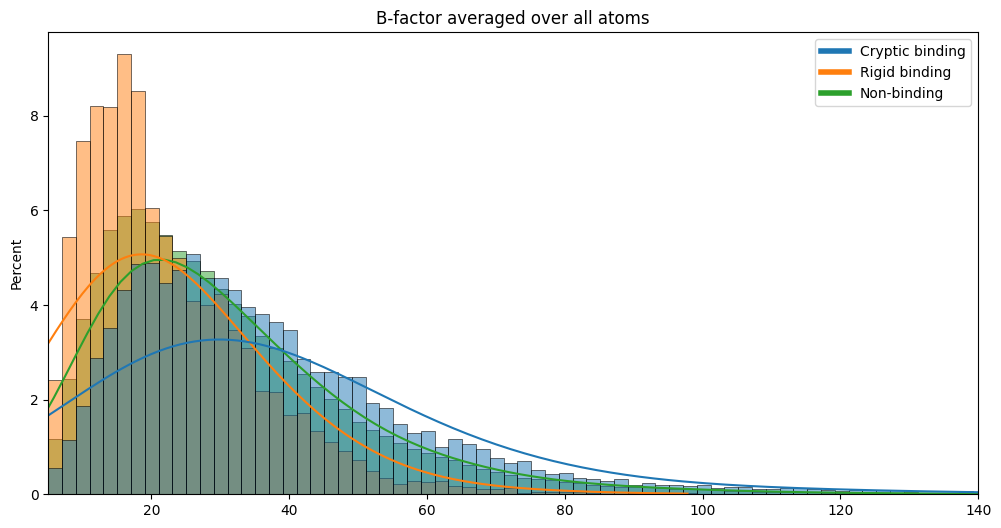

In [95]:
print_plots(
    '../../../data/features/B-factors/cryptobench-dataset',
    '../../../data/features/B-factors/rigid-dataset',
    '../../../data/features/fluctuation/cryptobench-dataset/indices',
    '../../../data/features/fluctuation/rigid-dataset/indices',
    'B-factor averaged over all atoms', xmax=(5, 140), bins=160
)